# WHAT AFFECTS BORROWER'S APR?

# I. Investigation Overview

In this investigation, I wanted to look at the relationship and trends between Borrower APR and other attributes. The analysis will focus on these attributes: Lender Yields, Prosper Score, Credit Score, Income Range, Loan Origination Time, Employment status, Loan Status and Loan Original Amount. 

# II.  Dataset Overview

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

In [4]:
#read file
Loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
Loan_data.shape

(113937, 81)

In [4]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This data dictionary explains the variables in the data set.
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI

# Distribution of Borrower APR

In [24]:
Loan_data['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

There are 113912 inputs of Borrower APR in the dataset. The minimum is 0.006 while maximum ix 0.512. The average is 0.21. Also, 75% of the loans have Borrower APR less than 0.3.

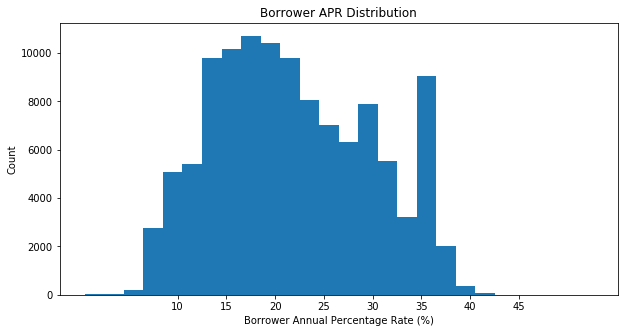

In [5]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = Loan_data['BorrowerAPR']*100
bins = np.arange(0.5, Loan_data['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plt.title('Borrower APR Distribution')
plt.show()

The borrower annual percentage rate is usually in the range of 15 - 20%. There are fewer loans with the rate out this range except the groups of loan with the rate of 35%

# Relationship between Borrower APR with other attributes

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


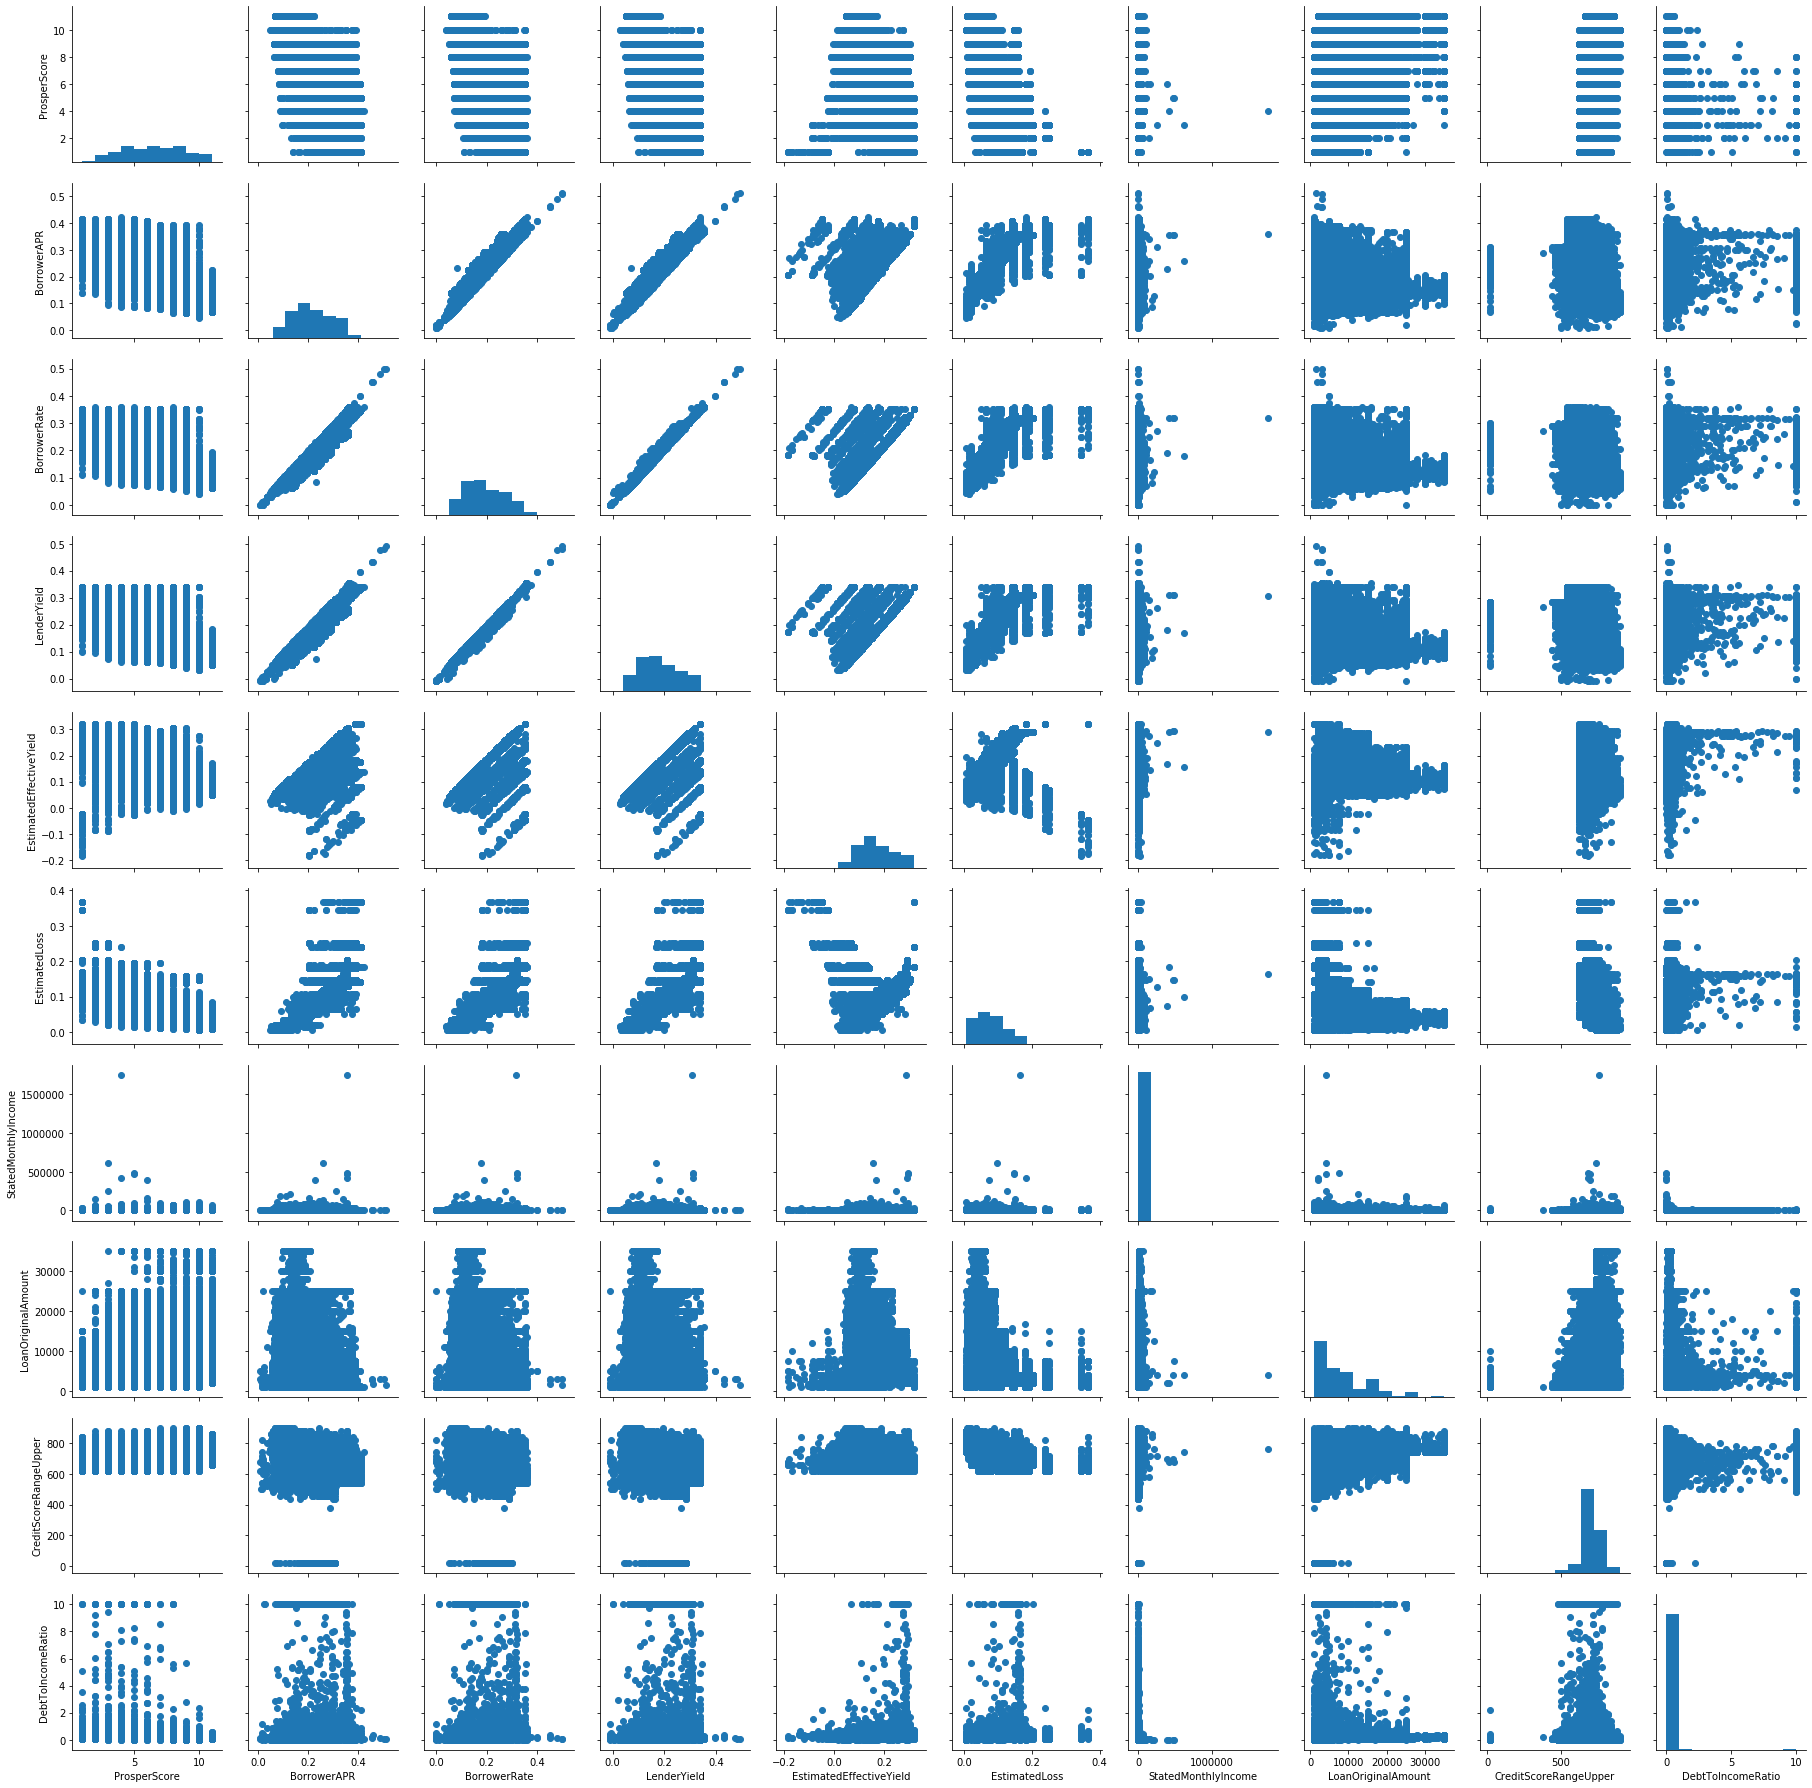

In [33]:
Loan_matrix = ['ProsperScore', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss','StatedMonthlyIncome', 'LoanOriginalAmount', 'CreditScoreRangeUpper','DebtToIncomeRatio']
g = sns.PairGrid(data = Loan_data, vars = Loan_matrix);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

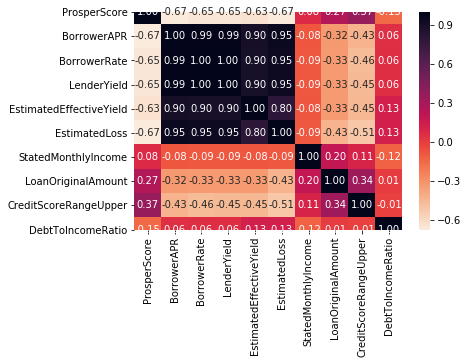

In [34]:
sns.heatmap(Loan_data[Loan_matrix].corr(),annot=True,
            cmap="rocket_r", fmt = '.2f')

- BorrowerAPR and LenderYield: Strong positive relationship means the higher the rate the higher the lender earns.
- ProsperScore has negative relationship with BorrowerAPR, LenderYield, Estimated Effective Yield and Loss. On the other hand, Borrower APR has strong poisitive relationship with Estimated Loss, LenderYield and Estimated Effective Yield. This show that lower score means higher risks and hence higher interest rates, higher the lender earns and higher risk of loss.

- LoanOriginalAmount has negative relationship with Borrower APR and Borrower Rate. We may expect that the bigger the loan amount will have less the interest rate. LoanOriginalAmount also has the strongest relationship with Estimated Loss. This relationship is negative. It means that the the bigger the amount of original loan is, the lower the loss is estimated.
- Borrower APR has a negative relationship with Credit Score. The higher the credit score is, the lower the borrower APR is likely to be.

# Borrower APR by Loan Origination Year

In [9]:
#conver into Year
Loan_data['LoanOriginationYear'] = pd.DatetimeIndex(Loan_data['LoanOriginationDate']).year
Loan_data['LoanOriginationYear']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: LoanOriginationYear, Length: 113937, dtype: int64

<Figure size 1800x1080 with 0 Axes>

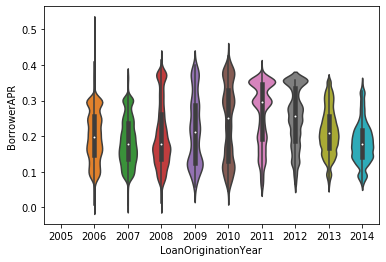

<Figure size 1800x1080 with 0 Axes>

In [10]:
sns.violinplot(data = Loan_data, y = 'BorrowerAPR', x = 'LoanOriginationYear')
plt.figure(figsize=(25,15))

The chart shows that before economy recession (2006, 2007), there is a normal distribution of Borrower APT from. However, during the recession (2008, 2009), there were more loans with low rate than those with high rate. When the economy started recovering (2010, 2011), there were more loans with higher Borrower APR.

# Borrower APR by Income Range

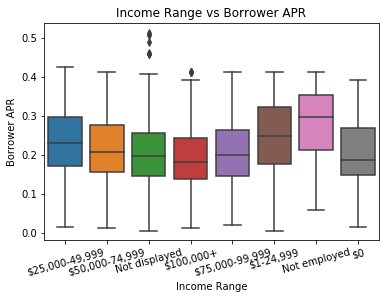

In [18]:
sns.boxplot(data = Loan_data, y = 'BorrowerAPR', 
            x = 'IncomeRange');

plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.title('Income Range vs Borrower APR');
plt.xticks(rotation = 15);

Borrower APR was likely to be higher in low income or not employed group

# Borrower APR by Employment Status

<Figure size 1440x576 with 0 Axes>

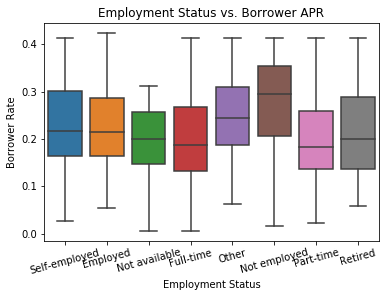

<Figure size 1440x576 with 0 Axes>

In [21]:
sns.boxplot(data = Loan_data, y = 'BorrowerAPR', 
            x = 'EmploymentStatus');

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status vs. Borrower APR');
plt.xticks(rotation = 15);
plt.figure(figsize = [20,8])

Borrower APR was highest in not employed group. Fulltime group tend to pay lower Borrower APR

# Borrower APR by ProsperScore

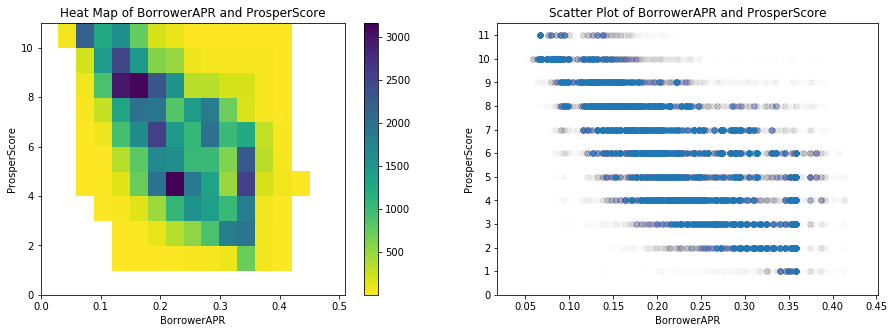

In [11]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, Loan_data['BorrowerAPR'].max()+0.02, 0.03)
bins_y = np.arange(0, Loan_data['ProsperScore'].max()+1, 1)
plt.hist2d(data = Loan_data, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = Loan_data, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

After creating bins for Borrowe APR and Prsosper Score, we can see that a lower ProsperScore leads to higher borrower rate and vice versa. This makes senses as lower prosper score means higher risks leading to higher rates.

# Borrower APR by estimated loss

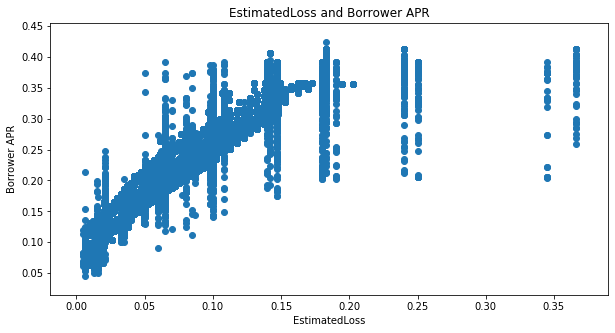

In [29]:
plt.figure(figsize = [10, 5])
plt.scatter(data=Loan_data,x='EstimatedLoss',y = 'BorrowerAPR')
plt.xlabel('EstimatedLoss')
plt.ylabel('Borrower APR')
plt.title('EstimatedLoss and Borrower APR');

Lower lower estimated losstends to lead to lower Borrower APR. On the contrary, the higher the estimated loss is, the higher borrower APR is.

# Borrower APR  by LenderYield and ProsperRating

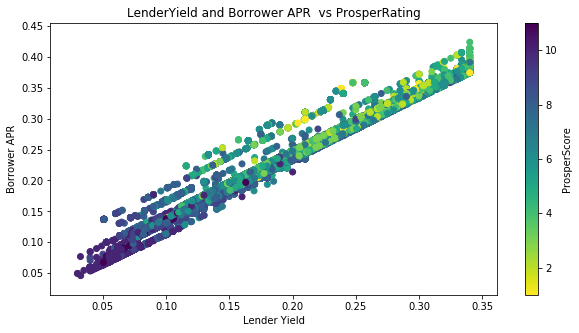

In [12]:
plt.figure(figsize = [10, 5])
plt.scatter(data=Loan_data,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield and Borrower APR  vs ProsperRating');

Above is the relationship betweem Borrower APR, Lender Yield and Prosper Rating. Strong positive relationship betweem BorrowerAPR and LenderYield means the higher the rate the higher the lender earns. We also see that most of loans with lower BorrowerAPR & LenderYield have higher ProsperScore and visa-versa.

# Borrower APR  by CreditScore & Prosper Score

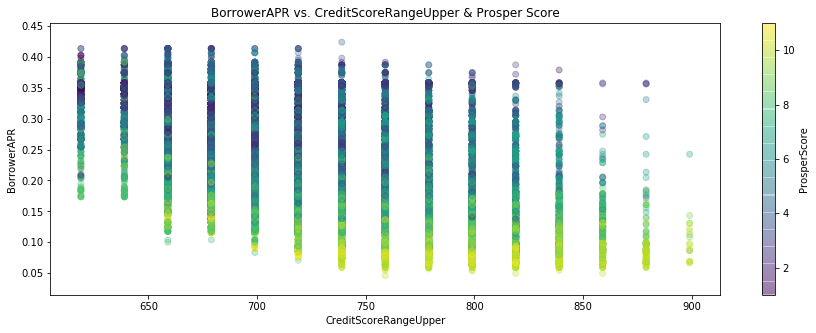

In [14]:
# BorrowerAPR vs. CreditScoreRangeUpper & Prosper Score
plt.figure(figsize = [15, 5]) 
plt.scatter(data = Loan_data, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & Prosper Score')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

The chart demonstrates clearly a strong positive relationship between Credit Score and Prosper Score. Also, either of them has strong negative relationship with Borrowe APR. Low credit score and prosper score will lead to higher borrower APR

# BorrowerAPR by ProsperScore & Loan Original Amount

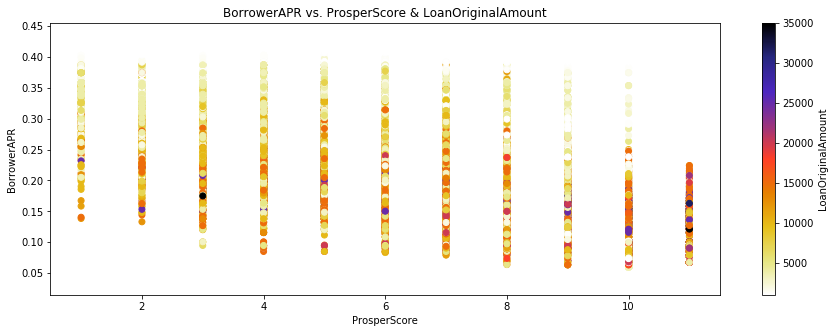

In [15]:
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = Loan_data,\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

The chart shows us that Loan Original Amount has positive relationship with Prosper Score but both of them have nwgative relationship with Borrower APR. Higher prosper score will get lower borrower APR. Also, most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

# Borrower APR vs. Employment Status in each Loan Status

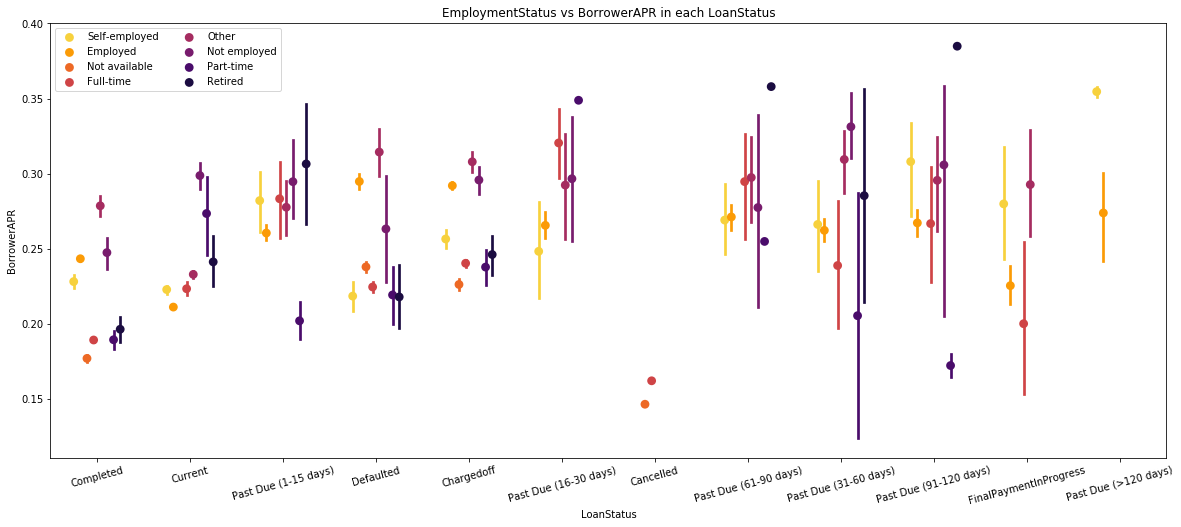

In [16]:
fig = plt.figure(figsize = [20,8])
ax = sns.pointplot(data = Loan_data, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

Past Due loans generally have higher interest rates in all employment statuses.
Part time, Retired or Not employ tend to have higher rate than those with full-time job or being employed.

# Borrower APR vs. Prosper Score  in each Employment Status

In [30]:
def hist2dgrid(x, y, **kwargs):
   
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


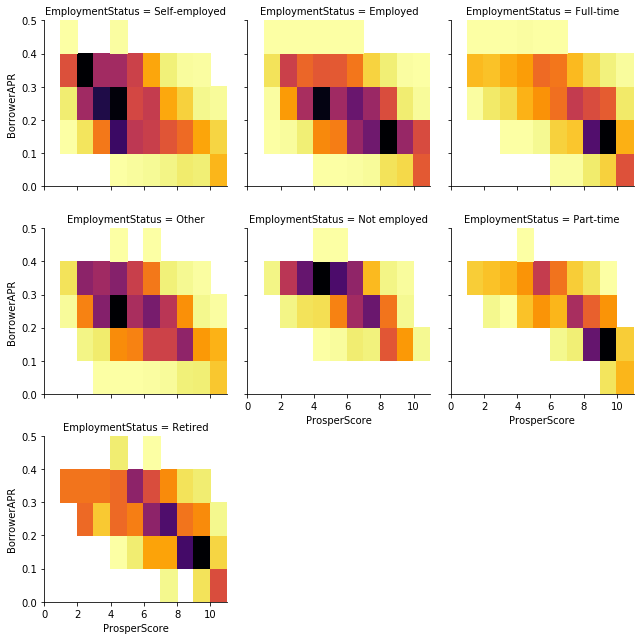

In [31]:
# create faceted heat maps on the EmploymentStatus
g = sns.FacetGrid(data = Loan_data[Loan_data['EmploymentStatus'] != 'Not available'],\
                 col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');

According to charts above, there is a likelihood that:

- Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
- Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
- Retired people have higher ProsperScore and lower BorrowerAPR
- Employed people are diverse regarding the ProsperScore and BorrowerAPR